In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('/content/drive/MyDrive/Dataset/startup-expansion.xlsx')
df.head()

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
0,1,Peoria,Arizona,Region 2,Old,2601,48610
1,2,Midland,Texas,Region 2,Old,2727,45689
2,3,Spokane,Washington,Region 2,Old,2768,49554
3,4,Denton,Texas,Region 2,Old,2759,38284
4,5,Overland Park,Kansas,Region 2,Old,2869,59887


In [ ]:
df.columns

Index(['Store ID', 'City', 'State', 'Sales Region', 'New Expansion',
       'Marketing Spend', 'Revenue'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Store ID         150 non-null    int64 
 1   City             150 non-null    object
 2   State            150 non-null    object
 3   Sales Region     150 non-null    object
 4   New Expansion    150 non-null    object
 5   Marketing Spend  150 non-null    int64 
 6   Revenue          150 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 8.3+ KB


In [ ]:
df[df.duplicated()]

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue


In [ ]:
df.isnull().sum()

,0
Store ID,0
City,0
State,0
Sales Region,0
New Expansion,0
Marketing Spend,0
Revenue,0


Store ID


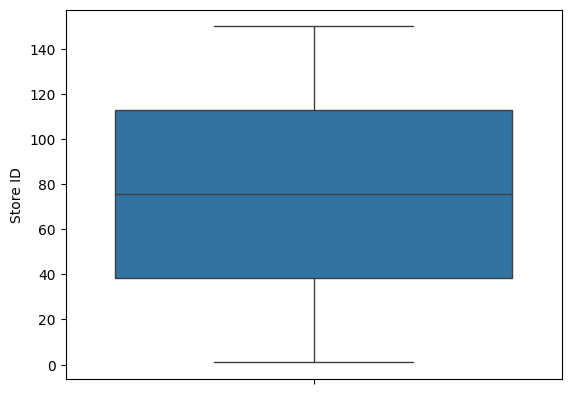

----------------------------------------------------------------------------------------------------
Marketing Spend


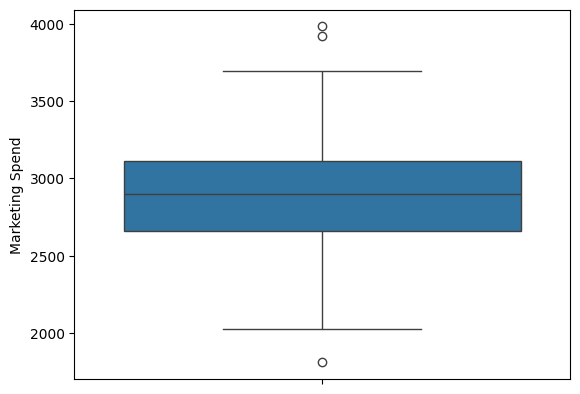

----------------------------------------------------------------------------------------------------
Revenue


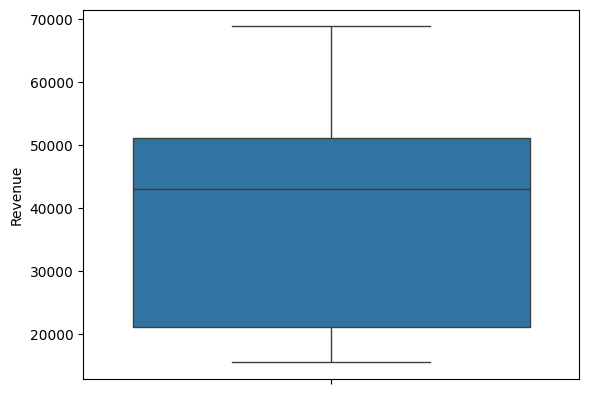

----------------------------------------------------------------------------------------------------


In [ ]:
for col in df.select_dtypes(include='number').columns:
  print(col)
  sns.boxplot(df[col])
  plt.show()
  print('-'*100)

In [ ]:
df[df['Marketing Spend']>3800]

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
62,63,Richmond,California,Region 2,Old,3924,19448
86,87,Amarillo,Texas,Region 2,Old,3984,56089


In [ ]:
q1 = np.quantile(df['Marketing Spend'],0.25)
q3 = np.quantile(df['Marketing Spend'],0.75)
iqr = q3-q1
lower_bound = q1-(1.5*iqr)
upper_bound = q3+(1.5*iqr)
print(lower_bound,upper_bound,iqr)

1988.375 3785.375 449.25


<ipython-input-12-59985d4846c8>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3785.375' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Marketing Spend']>upper_bound,'Marketing Spend'] = upper_bound


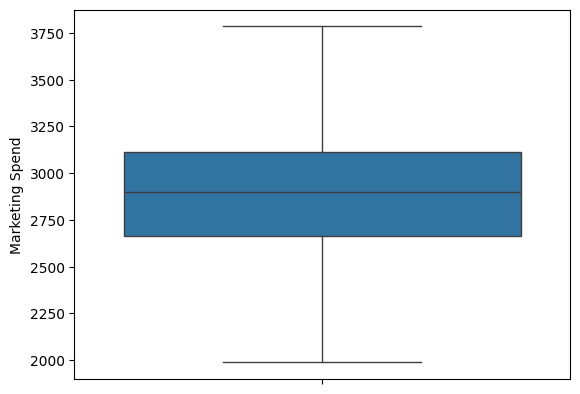

In [ ]:
df.loc[df['Marketing Spend']>upper_bound,'Marketing Spend'] = upper_bound
df.loc[df['Marketing Spend']<lower_bound,'Marketing Spend'] = lower_bound
sns.boxplot(df['Marketing Spend'])
plt.show()

In [ ]:
df['City'].describe()

,City
count,150
unique,149
top,Rochester
freq,2


In [ ]:
df['State'].describe()

,State
count,150
unique,35
top,California
freq,40


In [ ]:
df['Sales Region'].describe()
df['Sales Region'].value_counts()

,count
Sales Region,
Region 2,86
Region 1,64


In [ ]:
df['New Expansion'].nunique()

2

***Exploring and Analysis Data***

In [ ]:
df.sample(10)

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
91,92,Augusta,Georgia,Region 1,Old,2676.0,47482
117,118,Bellevue,Washington,Region 2,Old,2542.0,40462
80,81,Garden Grove,California,Region 2,Old,3285.0,57530
46,47,Roseville,California,Region 2,Old,3220.0,43397
77,78,New Haven,Connecticut,Region 1,Old,3162.0,45550
128,129,Moreno Valley,California,Region 2,Old,3507.0,59254
122,123,Bridgeport,Connecticut,Region 1,Old,2914.0,47108
93,94,Aurora,Illinois,Region 1,Old,2685.0,50650
105,106,Richardson,Texas,Region 2,Old,3228.0,22824
130,131,Savannah,Georgia,Region 1,Old,2028.0,36029


In [ ]:
df['profit']= df['Revenue']-df[' ']
df

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,profit
0,1,Peoria,Arizona,Region 2,Old,2601.0,48610,-46009.0
1,2,Midland,Texas,Region 2,Old,2727.0,45689,-42962.0
2,3,Spokane,Washington,Region 2,Old,2768.0,49554,-46786.0
3,4,Denton,Texas,Region 2,Old,2759.0,38284,-35525.0
4,5,Overland Park,Kansas,Region 2,Old,2869.0,59887,-57018.0
...,...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251.0,34603,-32352.0
146,147,Brownsville,Texas,Region 2,New,3675.0,63148,-59473.0
147,148,Rockford,Illinois,Region 1,New,2648.0,43377,-40729.0
148,149,College Station,Texas,Region 2,New,2994.0,22457,-19463.0


In [ ]:
#df.drop('profit',axis=1,inplace=True)
df

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
0,1,Peoria,Arizona,Region 2,Old,2601.0,48610
1,2,Midland,Texas,Region 2,Old,2727.0,45689
2,3,Spokane,Washington,Region 2,Old,2768.0,49554
3,4,Denton,Texas,Region 2,Old,2759.0,38284
4,5,Overland Park,Kansas,Region 2,Old,2869.0,59887
...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251.0,34603
146,147,Brownsville,Texas,Region 2,New,3675.0,63148
147,148,Rockford,Illinois,Region 1,New,2648.0,43377
148,149,College Station,Texas,Region 2,New,2994.0,22457


In [ ]:
df['profit'] = df['Revenue']-df['Marketing Spend']

In [ ]:
df['ROMS'] = df['Revenue']-df['Marketing Spend'] /df['Marketing Spend']

In [ ]:
df['ROMS%'] = df['ROMS'] / 100

In [ ]:
df.to_csv('startup-expansion-modified.csv')

In [ ]:
df

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,ROI,profit,ROMS,ROMS%
0,1,Peoria,Arizona,Region 2,Old,2601.0,48610,1868.90,46009.0,48609.0,486.09
1,2,Midland,Texas,Region 2,Old,2727.0,45689,1675.43,42962.0,45688.0,456.88
2,3,Spokane,Washington,Region 2,Old,2768.0,49554,1790.25,46786.0,49553.0,495.53
3,4,Denton,Texas,Region 2,Old,2759.0,38284,1387.60,35525.0,38283.0,382.83
4,5,Overland Park,Kansas,Region 2,Old,2869.0,59887,2087.38,57018.0,59886.0,598.86
...,...,...,...,...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251.0,34603,1537.23,32352.0,34602.0,346.02
146,147,Brownsville,Texas,Region 2,New,3675.0,63148,1718.31,59473.0,63147.0,631.47
147,148,Rockford,Illinois,Region 1,New,2648.0,43377,1638.10,40729.0,43376.0,433.76
148,149,College Station,Texas,Region 2,New,2994.0,22457,750.07,19463.0,22456.0,224.56
